In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing the datasets
bbc = pd.read_csv(r"C:\Users\hansf\Documents\ADS_2020\DataWrangling\datasets\bbc.csv")
#eteam = bbc = pd.read_csv(r"C:\Users\hansf\Documents\ADS_2020\DataWrangling\datasets\eteam.csv", encoding='utf-8')
game = pd.read_csv(r"C:\Users\hansf\Documents\ADS_2020\DataWrangling\datasets\bbc.csv")
movies = pd.read_csv(r"C:\Users\hansf\Documents\ADS_2020\DataWrangling\datasets\movies.csv")

In [3]:
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## What is the avg of reviews by country?

In [4]:
#group in contries and get the avg of the revies | Sort the values
movies_sorted = movies['imdb_score'].groupby(movies['country']).mean().sort_values()
movies_sorted

country
New Line                4.400000
Bahamas                 4.400000
Aruba                   4.800000
Peru                    5.400000
Cambodia                5.600000
Georgia                 5.600000
Switzerland             5.750000
South Korea             5.845455
Russia                  5.877778
Belgium                 5.966667
Slovakia                6.000000
Thailand                6.080000
Bulgaria                6.100000
Canada                  6.175294
Germany                 6.209639
India                   6.289474
Official site           6.300000
USA                     6.373327
Slovenia                6.400000
Romania                 6.433333
Australia               6.444186
Hungary                 6.450000
China                   6.625926
Netherlands             6.633333
South Africa            6.650000
France                  6.696063
Greece                  6.700000
Hong Kong               6.706667
Ireland                 6.777778
UK                      6.781197
Sp

In [5]:
# only movies > 7,5 on avg
movies_top = movies_sorted[movies_sorted>7.5] 

Text(0.5, 1.0, 'Avg Reviews by Contry')

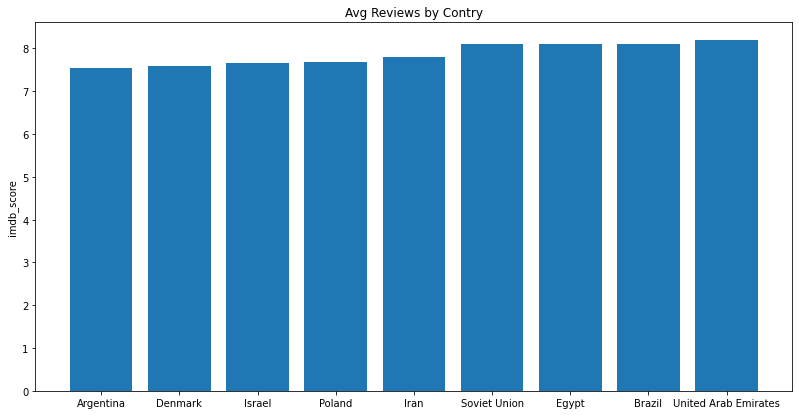

In [6]:
# This example fits a4 paper with 5mm margin printers

# figure settings
figure_width = 28.7 # cm
figure_height = 15 # cm
left_right_magrin = 1 # cm
top_bottom_margin = 1 # cm

# Don't change
left   = left_right_magrin / figure_width # Percentage from height
bottom = top_bottom_margin / figure_height # Percentage from height
width  = 1 - left*2
height = 1 - bottom*2
cm2inch = 1/2.54 # inch per cm

# specifying the width and the height of the box in inches
fig = plt.figure(figsize=(figure_width*cm2inch,figure_height*cm2inch))
ax = fig.add_axes((left, bottom, width, height))

x = movies_top.index
y = movies_top.values
ax.bar(x,y)
# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel(movies_top.name)
ax.set_title('Avg Reviews by Contry')



## Which are the top 10 movies? 

In [7]:
#group in movie title, pick the sum of the scores and sort
movies['imdb_score'].groupby(movies['movie_title']).mean()

movie_title
10 Cloverfield Lane            7.3
10 Days in a Madhouse          7.5
10 Things I Hate About You     7.2
10,000 B.C.                    7.2
102 Dalmatians                 4.8
                              ... 
[Rec]                          7.5
eXistenZ                       6.8
xXx: State of the Union        4.3
xXx                            5.8
Æon Flux                       5.5
Name: imdb_score, Length: 3926, dtype: float64

In [8]:
movies_sorted = movies['imdb_score'].groupby(movies['movie_title']).mean().sort_values()
movies_sorted = pd.DataFrame(movies_sorted) # sort the values
movies_sorted.reset_index() #clear index

,movie_title,imdb_score
0,Justin Bieber: Never Say Never,1.6
1,Foodfight!,1.7
2,Disaster Movie,1.9
3,Superbabies: Baby Geniuses 2,1.9
4,United Passions,2.0
...,...,...
3921,The Dark Knight,9.0
3922,Dekalog,9.1
3923,Kickboxer: Vengeance,9.1
3924,The Shawshank Redemption,9.3


In [9]:
#show only the 10 best reviews
movies_sorted[-11:-1]

,imdb_score
movie_title,
Daredevil,8.8
Star Wars: Episode V - The Empire Strikes Back,8.8
It's Always Sunny in Philadelphia,8.8
The Lord of the Rings: The Return of the King,8.9
Schindler's List,8.9
The Godfather: Part II,9.0
The Dark Knight,9.0
Dekalog,9.1
Kickboxer: Vengeance,9.1


In [17]:
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Color,Brett Piper,18.0,80.0,7.0,3.0,Steve Diasparra,118.0,NaN,Action|Sci-Fi|Thriller,...,18.0,English,USA,NaN,75000.0,2015.0,15.0,4.5,NaN,34
3996,Color,Morgan Spurlock,193.0,100.0,293.0,0.0,Amanda Kearsan,0.0,11529368.0,Comedy|Documentary|Drama,...,404.0,English,USA,PG,65000.0,2004.0,0.0,7.3,1.78,0
3997,Color,Brandon Trost,66.0,82.0,32.0,128.0,Sean Whalen,968.0,40557.0,Comedy,...,22.0,English,USA,R,60000.0,2011.0,407.0,5.6,2.35,0
3998,Color,Joe Swanberg,65.0,82.0,217.0,442.0,Lena Dunham,10000.0,30084.0,Comedy|Drama,...,23.0,English,USA,R,70000.0,2014.0,969.0,5.6,1.85,812


In [67]:
#filter movies rating > MEAN
movies[movies['imdb_score']>(movies['imdb_score'].mean())]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,Color,Jason Miller,5.0,77.0,0.0,0.0,Dottie Alexander,45.0,NaN,Biography|Documentary|Music,...,1.0,English,USA,Unrated,100000.0,2014.0,0.0,7.6,1.78,82
3990,Color,Dennis Iliadis,241.0,114.0,29.0,616.0,Monica Potter,956.0,32721635.0,Crime|Horror|Thriller,...,279.0,English,USA,R,15000000.0,2009.0,878.0,6.6,1.85,0
3991,Color,Sut Jhally,16.0,80.0,3.0,0.0,Seth Ackerman,103.0,NaN,Documentary,...,13.0,English,USA,NaN,70000.0,2004.0,0.0,8.3,NaN,110
3992,Black and White,Darren Aronofsky,138.0,84.0,0.0,194.0,Clint Mansell,1000.0,3216970.0,Drama|Mystery|Thriller,...,586.0,English,USA,R,60000.0,1998.0,512.0,7.5,1.66,24000


In [27]:
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [54]:
#average score rating by director!
movies.loc[:, ['director_name','movie_title', 'imdb_score', 'num_voted_users','title_year']].groupby(movies['director_name']).mean()

,imdb_score,num_voted_users,title_year
director_name,,,
Aaron Hann,6.000000,13279.000000,2015.000000
Aaron Seltzer,2.700000,50415.000000,2006.000000
Abel Ferrara,6.600000,6921.000000,1996.000000
Adam Goldberg,5.400000,1618.000000,2003.000000
Adam McKay,6.916667,185868.666667,2009.333333
...,...,...,...
Zackary Adler,5.000000,1510.000000,2015.000000
Zal Batmanglij,6.800000,28815.500000,2012.000000
Zoran Lisinac,7.100000,330.000000,2013.000000


In [66]:
# Select movies with Content Rating == 13 years, return likes from actors and budget
movies.loc[movies['content_rating'] == "PG-13", ['actor_1_facebook_likes', 'actor_3_facebook_likes', 'budget']]

actor_1_facebook_likes    8.645355e+03
actor_3_facebook_likes    1.013669e+03
budget                    5.679067e+07
dtype: float64

In [58]:
movies.content_rating

0          PG-13
1          PG-13
2          PG-13
3          PG-13
4            NaN
          ...   
3995         NaN
3996          PG
3997           R
3998           R
3999    Approved
Name: content_rating, Length: 4000, dtype: object